In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
@njit
def Assign_Activity(eps1, eps2, gamma):
    rand = np.random.uniform(0, 1)
    power_rand = (eps1**(1-gamma) + (eps2**(1-gamma) - eps1**(1-gamma)) * rand)**(1/(1-gamma))
    return power_rand

@njit
def Calc_Act(A, frac, N):
    max = np.floor(float(N)*frac)
    act_ges = 0
    for i in range (len(A)):
        act_ges += A[i][1]

    act_frac = 0
    for i in range (max):
        act_frac += A[i][1]

    return act_frac/act_ges

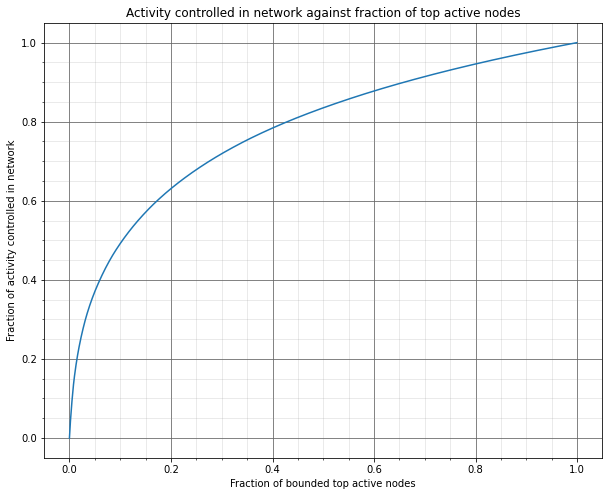

In [3]:
N = 10000

Acts = np.zeros((N,2))

for i in range (N):
    Acts[i][0] = Assign_Activity(0.01, 1.0, 2.1)
    Acts[i][1] = i

Acts_sort = np.flip(Acts[np.argsort(Acts[:,0])])

#print(Acts_sort)

fracs = np.arange(0, 1.0, 0.001)

perc = np.zeros(len(fracs))
for i in range (len(fracs)):
    perc[i] = Calc_Act(Acts_sort, fracs[i], N)

plt.figure(figsize=(10,8))
plt.title("Activity controlled in network against fraction of top active nodes")
plt.xlabel("Fraction of bounded top active nodes")
plt.ylabel("Fraction of activity controlled in network")
plt.plot(fracs, perc)
plt.grid(visible=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.25)
plt.show()